In [1]:
# Import stuff
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_bare_axes(figsize=(8,6)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.xticks([])
    plt.yticks([])
    return fig, ax

In [3]:
class Spiral:
    
    def __init__(self, k=1):
        self._r = np.linspace(0.0, 1.0, 100 * k)
        self._t = 2 * np.pi * k * self._r
        
    def __copy__(self):
        new_spiral = Spiral()
        new_spiral._r = self._r
        new_spiral._t = self._t
        return new_spiral
        
    ### Internal Methods ###
    
    def _set_cartesian(self, x, y):
        self._r = np.sqrt(x**2 + y**2)
        self._t = np.arctan2(y, x)
        
    ### Getters ###
    
    def get_polar(self):
        return self._t, self._r
    
    def get_cartesian(self):
        x = self._r * np.cos(self._t)
        y = self._r * np.sin(self._t)
        return x, y
        
    ### Affine Transformations ###
    
    def offset(self, x_offset=0.0, y_offset=0.0):
        x, y = self.get_cartesian()
        x += x_offset
        y += y_offset
        self._set_cartesian(x, y)
    
    def stretch(self, x_stretch=1.0, y_stretch=1.0):
        matrix = np.diag([x_stretch, y_stretch])
        self.linear_transform(matrix)
    
    def rotate(self, angle):
        matrix = np.array(
            [[np.cos(angle), -np.sin(angle)],
             [np.sin(angle), np.cos(angle)]])
        self.linear_transform(matrix)
    
    def linear_transform(self, A):
        x, y = self.get_cartesian()
        pos = np.row_stack((x, y))
        pos = np.dot(A, pos)
        self._set_cartesian(pos[0, :], pos[1, :])
    
    ### Nonlinear Transformations ###
    
    def square_the_circle(self):
        u, v = self.get_cartesian()
        trtt = 2 * np.sqrt(2)
        x = (np.sqrt(2 + u**2 - v**2 + trtt * u) - np.sqrt(2 + u**2 - v**2 - trtt * u)) / 2
        y = (np.sqrt(2 - u**2 + v**2 + trtt * v) - np.sqrt(2 - u**2 + v**2 - trtt * v)) / 2
        self._set_cartesian(x, y)
        

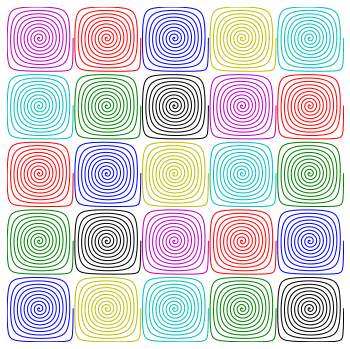

In [4]:
fig, ax = get_bare_axes()

for ii in range(5):
    for jj in range(5):
        spiral = Spiral(10)
        spiral.square_the_circle()
        spiral.offset(x_offset=2*ii, y_offset=2*jj)
        x, y = spiral.get_cartesian()
        ax.plot(x, y)

plt.show()

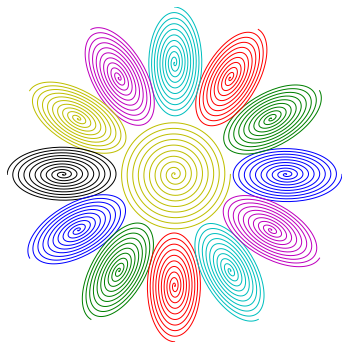

In [5]:
unit_angle = np.pi/6
shift = np.array([2.0, 0])

fix, ax = get_bare_axes()

for ii in range(12):
    angle = ii * unit_angle

    spiral = Spiral(10)
    spiral.stretch(y_stretch=0.5)
    spiral.offset(x_offset=2.0)
    spiral.rotate(angle)
    x, y = spiral.get_cartesian()
    ax.plot(x, y)

spiral = Spiral(10)
x, y = spiral.get_cartesian()
ax.plot(x, y)

    
plt.show()